In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("cardekho_imputated 2.csv")
df.head()

,Unnamed: 0,car_name,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,3.570039e+05,4.654015e+05,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,7.110000e+05,7.480000e+05,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,8.540829e+05,1.307926e+06,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,3.570039e+05,4.654015e+05,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,1.014000e+06,1.379000e+06,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [3]:
df = df.drop("Unnamed: 0",axis=1)
df.head()

,car_name,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,3.570039e+05,4.654015e+05,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,7.110000e+05,7.480000e+05,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,8.540829e+05,1.307926e+06,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,3.570039e+05,4.654015e+05,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,1.014000e+06,1.379000e+06,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [4]:
df = df.drop("car_name",axis=1)
df.head()

,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti,Alto,3.570039e+05,4.654015e+05,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai,Grand,7.110000e+05,7.480000e+05,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai,i20,8.540829e+05,1.307926e+06,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti,Alto,3.570039e+05,4.654015e+05,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford,Ecosport,1.014000e+06,1.379000e+06,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [5]:
df['avg_car_price'] = (df['min_cost_price'] + df['max_cost_price'])/2
df.drop(columns= ['min_cost_price', 'max_cost_price'], inplace = True)
df.head()

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price,avg_car_price
0,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000,4.112027e+05
1,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000,7.295000e+05
2,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000,1.081004e+06
3,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000,4.112027e+05
4,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000,1.196500e+06


In [6]:
data = df
data = data[data['selling_price'] < 20000000]
data = data[data['km_driven'] < 1000000]
data = data[data['mileage'] < 100]
data = data[data['engine'] < 6100]
data = data[data['max_power'] < 530]
data = data.reset_index(drop=True)

In [7]:
data = pd.get_dummies(data=data, columns=['seller_type','fuel_type','transmission_type','brand'], drop_first=True)
data.shape

(15404, 44)

In [8]:
data.head()

,model,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,avg_car_price,seller_type_Individual,...,brand_Mercedes-Benz,brand_Mini,brand_Nissan,brand_Porsche,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,Alto,9,120000,19.70,796,46.30,5,120000,4.112027e+05,1,...,0,0,0,0,0,0,0,0,0,0
1,Grand,5,20000,18.90,1197,82.00,5,550000,7.295000e+05,1,...,0,0,0,0,0,0,0,0,0,0
2,i20,11,60000,17.00,1197,80.00,5,215000,1.081004e+06,1,...,0,0,0,0,0,0,0,0,0,0
3,Alto,9,37000,20.92,998,67.10,5,226000,4.112027e+05,1,...,0,0,0,0,0,0,0,0,0,0
4,Ecosport,6,30000,22.77,1498,98.59,5,570000,1.196500e+06,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
data.columns

Index(['model', 'vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power',
       'seats', 'selling_price', 'avg_car_price', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'fuel_type_Diesel',
       'fuel_type_Electric', 'fuel_type_LPG', 'fuel_type_Petrol',
       'transmission_type_Manual', 'brand_BMW', 'brand_Datsun', 'brand_Force',
       'brand_Ford', 'brand_Honda', 'brand_Hyundai', 'brand_ISUZU',
       'brand_Isuzu', 'brand_Jaguar', 'brand_Jeep', 'brand_Kia',
       'brand_Land Rover', 'brand_Lexus', 'brand_MG', 'brand_Mahindra',
       'brand_Maruti', 'brand_Maserati', 'brand_Mercedes-AMG',
       'brand_Mercedes-Benz', 'brand_Mini', 'brand_Nissan', 'brand_Porsche',
       'brand_Renault', 'brand_Skoda', 'brand_Tata', 'brand_Toyota',
       'brand_Volkswagen', 'brand_Volvo'],
      dtype='object')

In [10]:
data = data.drop("model", axis =1)

In [11]:
data.head()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,avg_car_price,seller_type_Individual,seller_type_Trustmark Dealer,...,brand_Mercedes-Benz,brand_Mini,brand_Nissan,brand_Porsche,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,9,120000,19.70,796,46.30,5,120000,4.112027e+05,1,0,...,0,0,0,0,0,0,0,0,0,0
1,5,20000,18.90,1197,82.00,5,550000,7.295000e+05,1,0,...,0,0,0,0,0,0,0,0,0,0
2,11,60000,17.00,1197,80.00,5,215000,1.081004e+06,1,0,...,0,0,0,0,0,0,0,0,0,0
3,9,37000,20.92,998,67.10,5,226000,4.112027e+05,1,0,...,0,0,0,0,0,0,0,0,0,0
4,6,30000,22.77,1498,98.59,5,570000,1.196500e+06,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
X = data.drop(['selling_price'], axis=1)

In [13]:
y = data['selling_price']

In [14]:
X.head()

,vehicle_age,km_driven,mileage,engine,max_power,seats,avg_car_price,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_Diesel,...,brand_Mercedes-Benz,brand_Mini,brand_Nissan,brand_Porsche,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,9,120000,19.70,796,46.30,5,4.112027e+05,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,20000,18.90,1197,82.00,5,7.295000e+05,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11,60000,17.00,1197,80.00,5,1.081004e+06,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,37000,20.92,998,67.10,5,4.112027e+05,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,30000,22.77,1498,98.59,5,1.196500e+06,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [15]:
y.head()

0    120000
1    550000
2    215000
3    226000
4    570000
Name: selling_price, dtype: int64

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score, median_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from matplotlib import pyplot as plt
import seaborn as sns

In [17]:
x_train, x_test,y_train,y_test = train_test_split(X,y,test_size =0.2)

In [18]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [19]:
def do_prediction(classifier):
    classifier.fit(x_train, y_train)
    prediction = classifier.predict(x_test)
    cross_validation_score = cross_val(x_train, y_train, classifier)
    error = median_absolute_error(y_test, prediction)
    r2_scr = r2_score(y_test, prediction)
    
    return error, cross_validation_score, r2_scr, prediction

def cross_val(x_train, y_train, classifier):
    accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 5)
    return accuracies.mean()

def pre_vs_test_graph(y_test, prediction):
    m = y_test
    n = prediction
    plt.scatter(m, n, c ="blue")
    plt.show()
    
def density_errors(prediction):
    m = prediction
    sns.histplot(m)

def plot_feature_importance(importance,names,model_type):

    feature_importance = np.array(importance)
    feature_names = np.array(names)
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    plt.figure(figsize=(10,8))
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

Linear Regression MAE: 118223.29
Cross validation score: -2.0198383752100263e+21
R2 score: 0.72


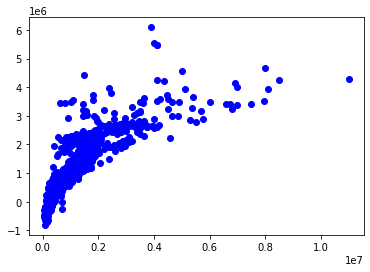

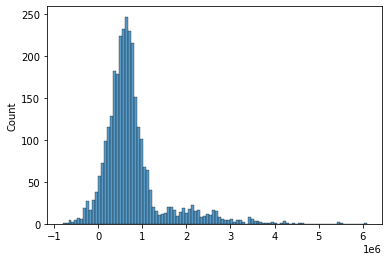

In [20]:
model_1 = LinearRegression()
error, score, r2_scr, y_pred = do_prediction(model_1)

print('Linear Regression MAE: {}'.format(round(error,2)))
print('Cross validation score: {}'.format(round(score,2)))
print('R2 score: {}'.format(round(r2_scr,2)))
pre_vs_test_graph(y_test, y_pred)
density_errors(y_pred)

Decision Tree Regressor MAE: 60000.0
Cross validation score: 0.9
R2 score: 0.91


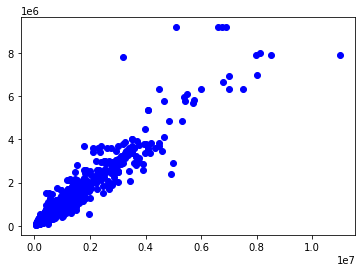

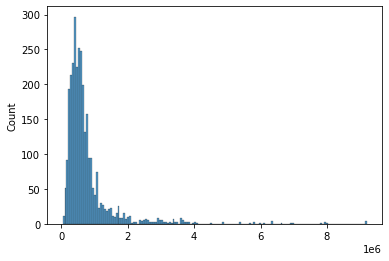

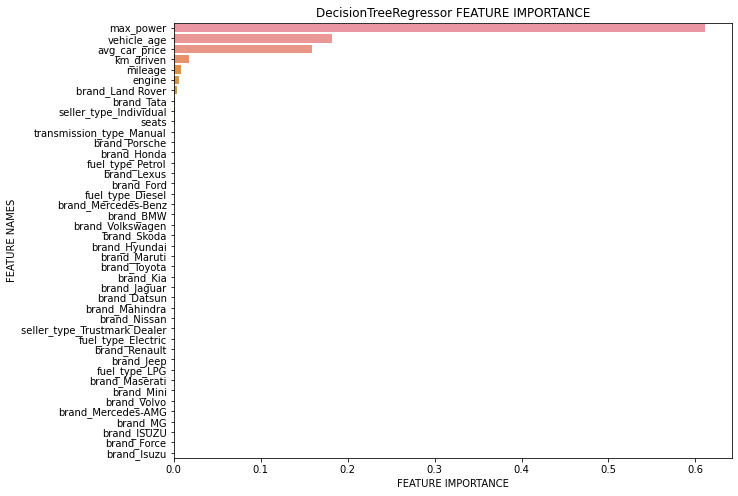

In [21]:
model_2 = DecisionTreeRegressor()
error, score, r2_scr, y_pred = do_prediction(model_2)

print('Decision Tree Regressor MAE: {}'.format(round(error,2)))
print('Cross validation score: {}'.format(round(score,2)))
print('R2 score: {}'.format(round(r2_scr,2)))
pre_vs_test_graph(y_test, y_pred)
density_errors(y_pred)
plot_feature_importance(model_2.feature_importances_,X.columns, "DecisionTreeRegressor")

Random Forest Regressor MAE: 48165.0
Cross validation score: 0.95
R2 score: 0.95


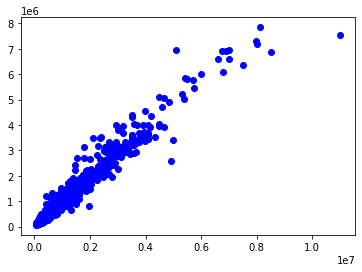

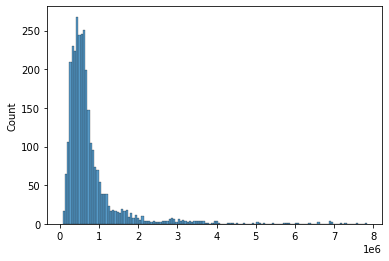

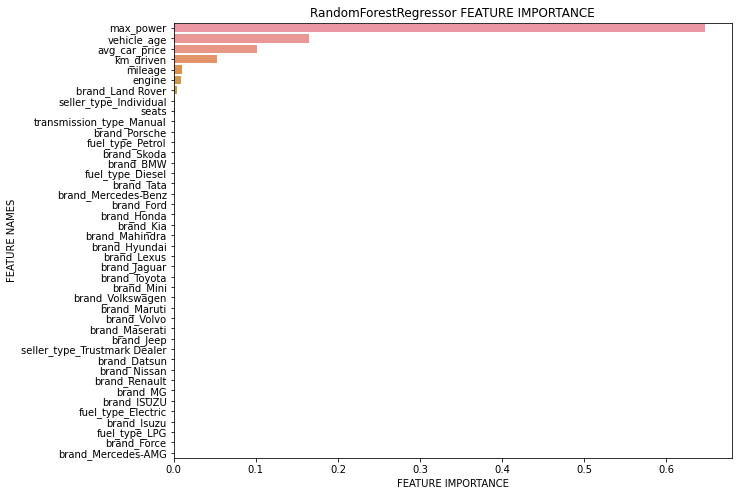

In [22]:
model_3 = RandomForestRegressor()
error, score, r2_scr, y_pred = do_prediction(model_3)

print('Random Forest Regressor MAE: {}'.format(round(error,2)))
print('Cross validation score: {}'.format(round(score,2)))
print('R2 score: {}'.format(round(r2_scr,2)))
pre_vs_test_graph(y_test, y_pred)
density_errors(y_pred)
plot_feature_importance(model_3.feature_importances_,X.columns,'RandomForestRegressor')

Gradient Boosting Regressor MAE: 58568.11
Cross validation score: 0.94
R2 score: 0.95


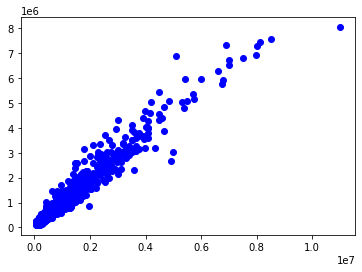

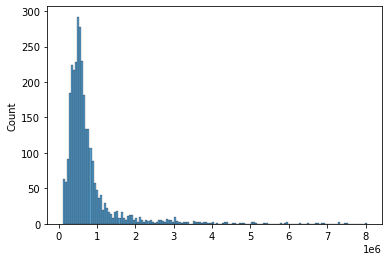

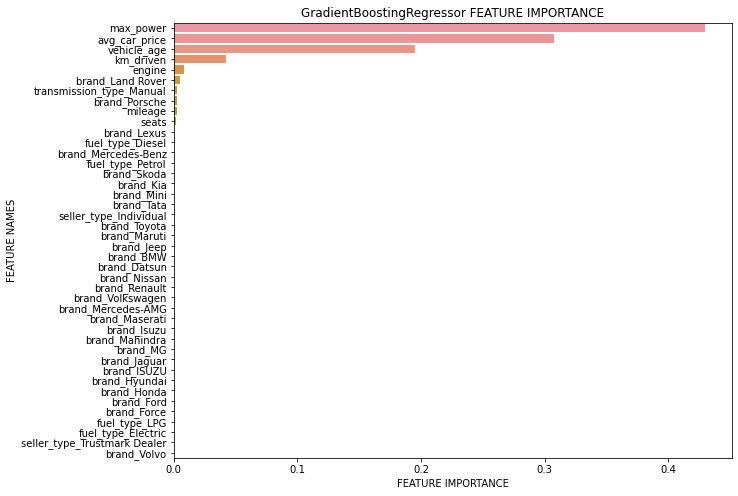

In [23]:
model_4 = GradientBoostingRegressor()
error, score, r2_scr, y_pred = do_prediction(model_4)

print('Gradient Boosting Regressor MAE: {}'.format(round(error,2)))
print('Cross validation score: {}'.format(round(score,2)))
print('R2 score: {}'.format(round(r2_scr,2)))
pre_vs_test_graph(y_test, y_pred)
density_errors(y_pred)
plot_feature_importance(model_4.feature_importances_,X.columns, "GradientBoostingRegressor")

Gradient Boosting Regressor MAE: 50086.5
Cross validation score: 0.95
R2 score: 0.96


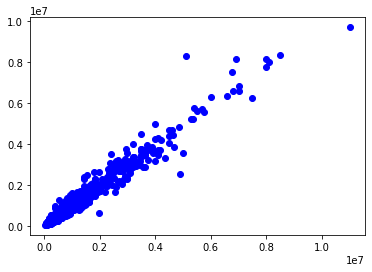

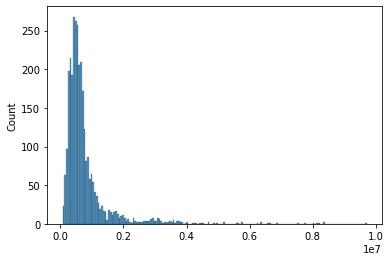

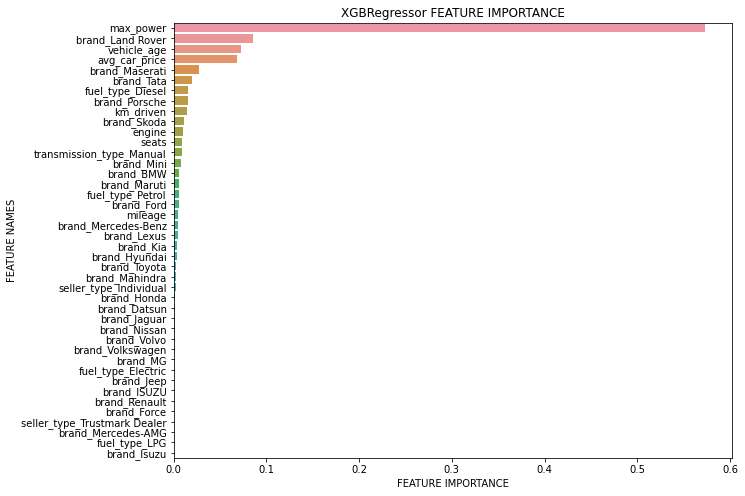

In [24]:
model_5 = XGBRegressor()
error, score, r2_scr, y_pred = do_prediction(model_5)

print('Gradient Boosting Regressor MAE: {}'.format(round(error,2)))
print('Cross validation score: {}'.format(round(score,2)))
print('R2 score: {}'.format(round(r2_scr,2)))
pre_vs_test_graph(y_test, y_pred)
density_errors(y_pred)
plot_feature_importance(model_5.feature_importances_,X.columns, "XGBRegressor")

In [26]:
import pickle
  
# Save the trained model as a pickle string.
saved_model = pickle.dumps(model_3)
  
# Load the pickled model
knn_from_pickle = pickle.loads(saved_model)